In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
la1 = pd.read_csv('la1.csv')
la2 = pd.read_csv('la2.csv')
la3 = pd.read_csv('la3.csv')
la4 = pd.read_csv('la4.csv')

In [3]:
lag = pd.concat([la1, la2, la2, la3, la4], ignore_index= True)
lag.head()

,Title,Price,Location,Beds,Baths,Toilets
0,Luxuriously And Well Built 4 Bedroom Detached ...,6000000,Lekki,4,4,5
1,Newly Built 24 Hours Servced 4 Bedrooms Duplex,3000000,Lekki,4,4,5
2,Furnished 5 Bedrooms Terrace With Swimming Pool,5000000,Lekki,5,6,5
3,Spacious 4 Bedroom Fully Detached Duplex With Bq,4000000,Lekki,4,5,4
4,Luxury 4 Bedroom Semi Detached Duplex With Bq,4000000,Lekki,4,4,5


In [4]:
[]

[]

In [5]:
lag.isna().sum()

Title       0
Price       0
Location    0
Beds        0
Baths       0
Toilets     0
dtype: int64

In [6]:
lag.dtypes

Title       object
Price        int64
Location    object
Beds         int64
Baths        int64
Toilets      int64
dtype: object

In [7]:
lag.Location.unique()

array([' Lekki', ' Ibeju Lekki', ' Magodo', ' Ikoyi', ' Gbagada',
       ' Agege', 'Lekki', 'Ajah', 'Ibeju Lekki', 'Ikorodu', 'Ikoyi',
       'Surulere', 'Victoria Island', 'Ikeja', 'Wuye', 'Camp', 'Isolo',
       'Sangotedo', 'Maryland', 'Ojodu', 'Ogba', 'Igando', 'Gbagada',
       'Ikosi', 'Yaba', 'Ejigbo', 'Shomolu', 'Odofin', 'Ogudu', 'Ketu',
       'Ipaja', 'Alimosho', 'Okota', 'Ojota', 'Ilupeju', 'Agege', 'Idimu'],
      dtype=object)

In [8]:
lag['Location'] = lag['Location'].apply(lambda x: x.strip())

In [9]:
lag['Location'].unique()

array(['Lekki', 'Ibeju Lekki', 'Magodo', 'Ikoyi', 'Gbagada', 'Agege',
       'Ajah', 'Ikorodu', 'Surulere', 'Victoria Island', 'Ikeja', 'Wuye',
       'Camp', 'Isolo', 'Sangotedo', 'Maryland', 'Ojodu', 'Ogba',
       'Igando', 'Ikosi', 'Yaba', 'Ejigbo', 'Shomolu', 'Odofin', 'Ogudu',
       'Ketu', 'Ipaja', 'Alimosho', 'Okota', 'Ojota', 'Ilupeju', 'Idimu'],
      dtype=object)

In [10]:
len(lag['Location'].unique())

32

In [11]:
type(lag.loc[0, 'Location'])

str

In [12]:
lag['Price_per_room'] = lag['Price'] / (lag['Beds'] + lag['Baths'] + lag['Toilets'])

In [13]:
lag['Total_rooms'] = (lag['Beds'] + lag['Baths'] + lag['Toilets'])

In [14]:
lag.head(10)

,Title,Price,Location,Beds,Baths,Toilets,Price_per_room,Total_rooms
0,Luxuriously And Well Built 4 Bedroom Detached ...,6000000,Lekki,4,4,5,461538.461538,13
1,Newly Built 24 Hours Servced 4 Bedrooms Duplex,3000000,Lekki,4,4,5,230769.230769,13
2,Furnished 5 Bedrooms Terrace With Swimming Pool,5000000,Lekki,5,6,5,312500.000000,16
3,Spacious 4 Bedroom Fully Detached Duplex With Bq,4000000,Lekki,4,5,4,307692.307692,13
4,Luxury 4 Bedroom Semi Detached Duplex With Bq,4000000,Lekki,4,4,5,307692.307692,13
5,17hours Serviced 4 Bedrooms Duplex With Bq,3000000,Lekki,4,4,5,230769.230769,13
6,Brand New 3bedroom Duplex Self Compound Plus 2...,2000000,Ibeju Lekki,3,4,4,181818.181818,11
7,Three Bedrooms Terrace,2000000,Lekki,3,4,5,166666.666667,12
8,4 Bedroom Terrace Available,3000000,Lekki,4,4,5,230769.230769,13
9,3 Bedrooms Terraced Duplex With Lovely Living ...,2200000,Magodo,3,3,4,220000.000000,10


In [15]:
len(lag)

2665

In [16]:
lag['Price_per_room'].describe()

count    2.665000e+03
mean     9.840738e+05
std      7.152967e+06
min      1.666667e-01
25%      1.545455e+05
50%      3.846154e+05
75%      1.272727e+06
max      3.000000e+08
Name: Price_per_room, dtype: float64

In [17]:
lag.groupby('Location')['Location'].count().sort_values(ascending = False)

Location
Lekki              714
Ikoyi              489
Ikorodu            455
Ajah               265
Ibeju Lekki        221
Victoria Island    194
Ikeja               68
Yaba                58
Surulere            42
Isolo               22
Maryland            19
Shomolu             19
Gbagada             18
Ogudu               12
Ojodu               12
Odofin              10
Ikosi                9
Okota                7
Ogba                 5
Ejigbo               4
Ipaja                4
Ilupeju              4
Agege                3
Sangotedo            2
Camp                 2
Igando               1
Idimu                1
Wuye                 1
Ketu                 1
Alimosho             1
Magodo               1
Ojota                1
Name: Location, dtype: int64

In [18]:
location_stats = lag.groupby('Location')['Location'].count().sort_values(ascending = False)

In [19]:
location_stat = location_stats[location_stats < 7]

In [20]:
location_stat

Location
Ogba         5
Ejigbo       4
Ipaja        4
Ilupeju      4
Agege        3
Sangotedo    2
Camp         2
Igando       1
Idimu        1
Wuye         1
Ketu         1
Alimosho     1
Magodo       1
Ojota        1
Name: Location, dtype: int64

In [21]:
lag.Location = lag.Location.apply(lambda x: 'other' if x in location_stat else x)

In [22]:
lag[lag.Location == 'other']

,Title,Price,Location,Beds,Baths,Toilets,Price_per_room,Total_rooms
9,3 Bedrooms Terraced Duplex With Lovely Living ...,2200000,other,3,3,4,2.200000e+05,10
18,Newly Built Luxurious 2 Bedroom Flat,400000,other,2,2,3,5.714286e+04,7
1333,Beautiful 4 Bedroom Terrace Duplex+ BQ For Sal...,100000000,other,4,5,6,6.666667e+06,15
1370,4 Bed Semi-Detached duplex,100000,other,4,4,5,7.692308e+03,13
1385,Fully Furnished Luxury 4 Bedroom Semi- Detache...,100000,other,4,4,5,7.692308e+03,13
1473,Newly Built 4 Bedroom Semi Detached Terrace To...,40000000,other,4,4,5,3.076923e+06,13
1519,NICELY RENOVATED 3BEDROOM FLAT,1500000,other,2,2,3,2.142857e+05,7
1522,NEWLY BUILT 3BEDROOM FLAT,700000,other,3,3,4,7.000000e+04,10
1535,Lovely 2bed Rooms Flat At Ejigbo.Lagos Mainland,300000,other,2,2,2,5.000000e+04,6
1981,Executive 3bed Rooms Duplex At Ejigbo.Lagos Ma...,450000,other,3,3,3,5.000000e+04,9


In [23]:
def remove_PPR_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Location'):
        mean = subdf['Price_per_room'].mean()
        std  = subdf['Price_per_room'].std()
        new_df = subdf[(subdf['Price_per_room'] >= (mean - std)) & (subdf['Price_per_room'] <= (mean + std))]
        df_out = pd.concat([df_out, new_df], ignore_index= True)
    return df_out

In [24]:
len(lag)

2665

In [25]:
lag_df = remove_PPR_outliers(lag)

In [26]:
len(lag_df)

2317

In [27]:
lag_df.head(5)

,Title,Price,Location,Beds,Baths,Toilets,Price_per_room,Total_rooms
0,2 Bedroom Flat / Apartment For Rent Ilaje Ajah...,650000,Ajah,2,2,2,108333.333333,6
1,2 Bedroom Flat / Apartment For Rent Ilaje Ajah...,650000,Ajah,2,2,2,108333.333333,6
2,2 Bedroom Flat / Apartment For Rent Ilaje Ajah...,650000,Ajah,2,2,2,108333.333333,6
3,2 Bedroom Flat / Apartment For Rent Ilaje Ajah...,650000,Ajah,2,2,2,108333.333333,6
4,2 Bedroom Flat / Apartment For Rent Ilaje Ajah...,650000,Ajah,2,2,2,108333.333333,6


In [28]:
def plot_lag(df, location):
    bed2 = df[(df.Beds == 2) & (df.Location == location)]
    bed3 = df[(df.Beds == 3) & (df.Location == location)]
    plt.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bed2.Total_rooms, bed2.Price, color = 'red',marker = '+', label = '2 Beds', s = 50)
    plt.scatter(bed3.Total_rooms, bed3.Price, color = 'blue',marker = '.', label = '3 Beds', s = 50)
    plt.xlabel('Total_rooms')
    plt.ylabel('Price')
    plt.legend()
    plt.title(location)  

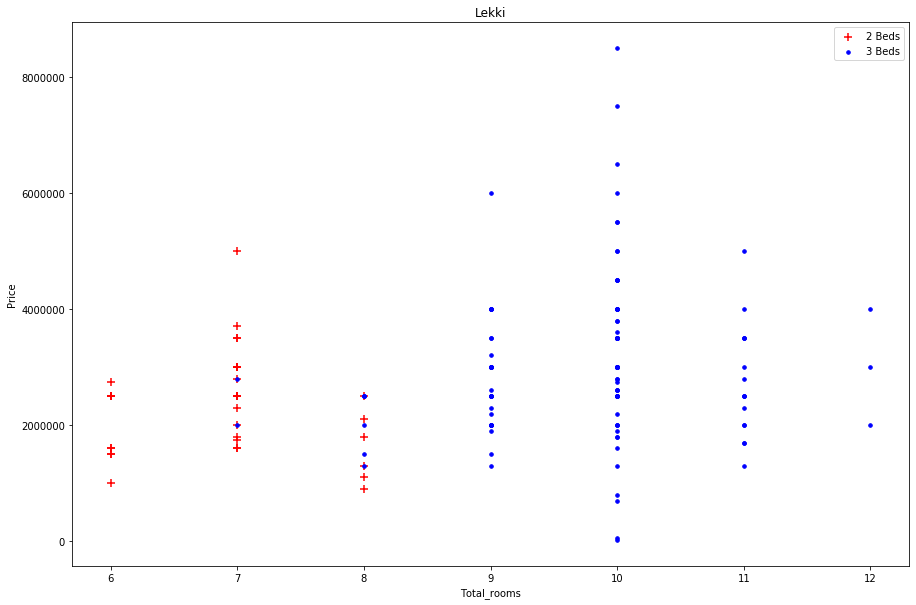

In [29]:
plot_lag(lag_df, 'Lekki')

In [30]:
def remove_beds_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Location'):
        beds_stat = {}
        for beds,  beds_df in location_df.groupby('Beds'):
            beds_stat[beds] = {
                'mean' : np.mean(beds_df.Price_per_room),
                'count' : beds_df.shape[0]  
            }
        for beds, beds_df in location_df.groupby('Beds'): 
            stats = beds_stat.get(beds- 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append( exclude_indices, beds_df[beds_df.Price_per_room < (stats['mean'])].index.values)
    df = df.drop( exclude_indices, axis = 'index')
    return df

In [31]:
new_lag_df = remove_beds_outliers(lag_df)

In [32]:
len(new_lag_df)

1425

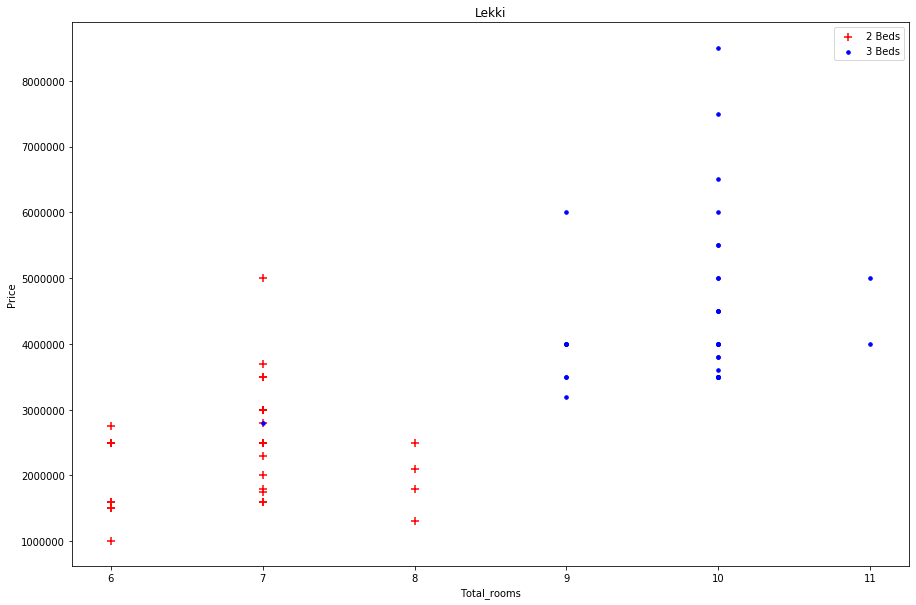

In [33]:
plot_lag(new_lag_df, 'Lekki')

Text(0.5, 0, 'Price per room')

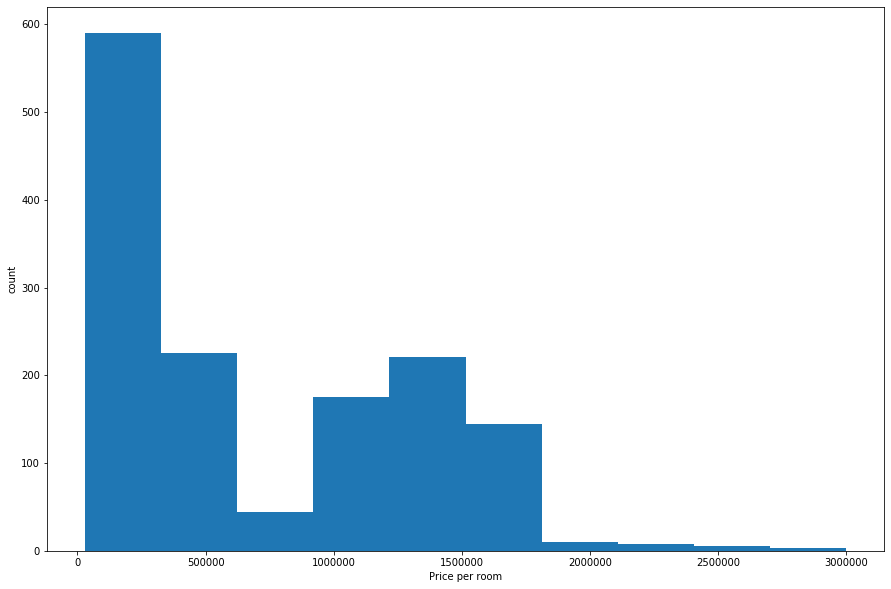

In [34]:
plt.hist(new_lag_df.Price_per_room)
plt.ylabel('count')
plt.xlabel('Price per room')

In [35]:
new_lag_df[new_lag_df.Baths > new_lag_df.Beds + 2]

,Title,Price,Location,Beds,Baths,Toilets,Price_per_room,Total_rooms


In [36]:
new_lag_df[new_lag_df.Toilets > new_lag_df.Beds + 2]

,Title,Price,Location,Beds,Baths,Toilets,Price_per_room,Total_rooms
789,6 Bedroom Bungalow On A 4 Plots Of Land,3000000,Ikorodu,6,6,10,136363.636364,22


In [37]:
final_lag_df = new_lag_df[new_lag_df.Toilets < new_lag_df.Beds + 2]

In [38]:
final_lag_df = final_lag_df.drop(['Title', 'Price_per_room', 'Total_rooms'], axis = 'columns')

In [39]:
final_lag_df

,Price,Location,Beds,Baths,Toilets
0,650000,Ajah,2,2,2
1,650000,Ajah,2,2,2
2,650000,Ajah,2,2,2
3,650000,Ajah,2,2,2
4,650000,Ajah,2,2,2
...,...,...,...,...,...
2310,1500000,other,3,4,4
2311,2000000,other,5,5,6
2312,5400000,other,3,3,3
2315,3600000,other,4,4,5


In [40]:
final_lag_df.groupby('Location')['Location'].count().sort_values(ascending = False)

Location
Lekki              371
Ikorodu            336
Ikoyi              173
Ajah               133
Ibeju Lekki        111
Victoria Island     83
Ikeja               39
Yaba                39
Surulere            21
Isolo               20
other               20
Maryland            16
Gbagada             12
Ojodu                9
Shomolu              9
Ogudu                7
Ikosi                7
Odofin               6
Okota                5
Name: Location, dtype: int64

In [46]:
final_lag_df.head(2)

,Price,Location,Beds,Baths,Toilets
0,650000,Ajah,2,2,2
1,650000,Ajah,2,2,2


In [47]:
dummies = pd.get_dummies(final_lag_df.Location)

In [49]:
dummies.head(5)

,Ajah,Gbagada,Ibeju Lekki,Ikeja,Ikorodu,Ikosi,Ikoyi,Isolo,Lekki,Maryland,Odofin,Ogudu,Ojodu,Okota,Shomolu,Surulere,Victoria Island,Yaba,other
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
df = pd.concat([final_lag_df, dummies], axis = 'columns')

In [51]:
df.head(2)

,Price,Location,Beds,Baths,Toilets,Ajah,Gbagada,Ibeju Lekki,Ikeja,Ikorodu,...,Maryland,Odofin,Ogudu,Ojodu,Okota,Shomolu,Surulere,Victoria Island,Yaba,other
0,650000,Ajah,2,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,650000,Ajah,2,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df = df.drop('other', axis = 'columns')

In [54]:
df.head(2)

,Price,Location,Beds,Baths,Toilets,Ajah,Gbagada,Ibeju Lekki,Ikeja,Ikorodu,...,Lekki,Maryland,Odofin,Ogudu,Ojodu,Okota,Shomolu,Surulere,Victoria Island,Yaba
0,650000,Ajah,2,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,650000,Ajah,2,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
x = df.drop(['Price', 'Location'], axis = 'columns')

In [57]:
y = df['Price']

In [55]:
from sklearn.model_selection import train_test_split

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 10)

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [66]:
def find_best_model(x, y):
    config = {
        'linear regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True, False]
            }
        },
        'lasso' : {
              'model' : Lasso(),
              'params' : {
                 'alpha' : [1.0, 2.0, 4.0, 5.0],
                 'normalize'  : [True, False],
                 'precompute' : [True, False],
                 'positive'   : [True, False],
                 'selection'  : ['cyclic', 'random']
             }
         },
        'decision_tree': {
            'model' : DecisionTreeRegressor(),
            'params' : { 
                'criterion' : ["mse", "friedman_mse", "mae"],
                'splitter'  : ['best', 'random']
         }
        }
           
    }
    scores = []
    cv = ShuffleSplit(n_splits= 5, test_size= 0.2, random_state= 0)
    for model_name, model_params in config.items():
        clf = GridSearchCV(model_params['model'], model_params['params'], cv = cv, return_train_score= False)
        clf.fit(x,y)
        scores.append({
            'model' : model_name,
            'best_score' : clf.best_score_,
            'best_params' : clf.best_params_
        })
    return pd.DataFrame(scores)

In [67]:
scores_df = find_best_model(x,y)

In [68]:
scores_df

,model,best_score,best_params
0,linear regression,0.861997,{'normalize': True}
1,lasso,0.861997,"{'alpha': 1.0, 'normalize': False, 'positive':..."
2,decision_tree,0.936398,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [71]:
dt_clf = DecisionTreeRegressor()
dt_clf.fit(x_train, y_train)
dt_clf.score(x_test, y_test)

0.94204050299423

In [73]:
x.head(2)

,Beds,Baths,Toilets,Ajah,Gbagada,Ibeju Lekki,Ikeja,Ikorodu,Ikosi,Ikoyi,...,Lekki,Maryland,Odofin,Ogudu,Ojodu,Okota,Shomolu,Surulere,Victoria Island,Yaba
0,2,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
def predict(beds, baths, toilets, location):
    loc_index = np.where(x.columns== location)[0][0]
    data = np.zeros(len(x.columns))
    data[0] = beds
    data[1] = baths
    data[2] = toilets
    if loc_index >= 0:
        data[loc_index] = 1
    return dt_clf.predict([data]) 

In [78]:
predict(1, 1, 1, 'Ojodu')

array([215000.])

In [79]:
from sklearn.externals import joblib
joblib.dump(dt_clf, 'lagos_home_price_model')

C:\Users\OzechiSamuel\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['lagos_home_price_model']

In [80]:
import json

columns = {
    'data_columns' : [col.lower() for col in x.columns]
}

with open ('columns.json', 'w') as f:
    f.write(json.dumps(columns))